#### Summary

This example is based on the OceanWatch tutorial meterial edited with Great Lakes satellite data.In this example you will see how to extract Great Lakes ice concentration data from the ERDDAP server and make a ice concentration map, and caculate the monthly

#### The example demonstrates the following techniques:

* Loading Great Lakes ice concentration data from Great Lakes ERDDAP data server.
* Create a map of ice concentration.
* Compute the daily mean over the selected region.
  

#### Datesets used:

* Great Lakes ice concentration: Great Lakes ice concentration product.
 

#### Import the required Python modules

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import urllib.request

from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import warnings
#warnings.filterwarnings('ignore')

####  Downlading data from ERDDAP server

Because ERDDAP includes RESTful services, you can download data listed on any ERDDAP platform from Python using the URL structure. For example, the following link allows you to subset daily ice concentration data from the dataset GL_Ice_Concentration_GCS

In this specific example, we will get the SST data from 2023-06-01 to 2023-06-30. the URL we generated is :

https://apps.glerl.noaa.gov/erddap/griddap/GL_Ice_Concentration_GCS.nc?ice_concentration%5B(1995-01-01T12:00:00Z):1:(2024-05-01T12:00:00Z)%5D%5B(41.38):1:(42.10)%5D%5B(-83.59):1:(-82.5)%5D


we extract the data in csv format due to the nc library not available.

In [2]:
url="https://apps.glerl.noaa.gov/erddap/griddap/GL_Ice_Concentration_GCS.nc?ice_concentration%5B(1995-01-01T12:00:00Z):1:(2024-05-01T12:00:00Z)%5D%5B(41.38):1:(42.10)%5D%5B(-83.59):1:(-82.5)%5D"
urllib.request.urlretrieve(url, "w_e_ice_concentration.nc")

('w_e_ice_concentration.nc', <http.client.HTTPMessage at 0x1b687bf22d0>)

#### Importing NetCDF4 data in Python

Now that we've downloaded the data locally, we can import it and extract our variables of interest.

The xarray package makes it very convenient to work with NetCDF files. Documentation is available here:
http://xarray.pydata.org/en/stable/why-xarray.html

In [3]:
import xarray as xr
import netCDF4 as nc

####  Open the file and load it as an xarray dataset:

In [4]:
ds = xr.open_dataset('w_e_ice_concentration.nc',decode_cf=False)
#ds = xr.open_dataset('e_sst.nc')

####  Examine the data structure:

In [5]:
ds

<xarray.Dataset>
Dimensions:            (time: 7146, latitude: 52, longitude: 79)
Coordinates:
  * time               (time) float64 7.89e+08 7.89e+08 ... 1.714e+09 1.715e+09
  * latitude           (latitude) float64 41.38 41.4 41.41 ... 42.07 42.08 42.1
  * longitude          (longitude) float64 -83.59 -83.58 -83.56 ... -82.51 -82.5
Data variables:
    ice_concentration  (time, latitude, longitude) float32 ...
Attributes: (12/28)
    cdm_data_type:              Grid
    Conventions:                CF-1.6, COARDS, ACDD-1.3
    Easternmost_Easting:        -82.496964466524
    GDAL:                       GDAL 3.4.3, released 2022/04/22
    geospatial_lat_max:         42.0985561800016
    geospatial_lat_min:         41.3837647963109
    ...                         ...
    standard_name_vocabulary:   CF Standard Name Table v29
    summary:                    Ice Concentration from Great Lakes Surface En...
    time_coverage_end:          2024-05-01T12:00:00Z
    time_coverage_start:        1995-01-01T12:00:00Z
    title:                      Ice Concentration from Great Lakes Surface En...
    Westernmost_Easting:        -83.590174818051

####  Examine which coordinates and variables are included in the dataset:

In [6]:
 ds.dims

Frozen({'time': 7146, 'latitude': 52, 'longitude': 79})

In [7]:
ds.coords

Coordinates:
  * time       (time) float64 7.89e+08 7.89e+08 ... 1.714e+09 1.715e+09
  * latitude   (latitude) float64 41.38 41.4 41.41 41.43 ... 42.07 42.08 42.1
  * longitude  (longitude) float64 -83.59 -83.58 -83.56 ... -82.52 -82.51 -82.5

In [8]:
ds.data_vars

Data variables:
    ice_concentration  (time, latitude, longitude) float32 ...

In [9]:
ds.attrs

{'cdm_data_type': 'Grid',
 'Conventions': 'CF-1.6, COARDS, ACDD-1.3',
 'Easternmost_Easting': -82.496964466524,
 'GDAL': 'GDAL 3.4.3, released 2022/04/22',
 'geospatial_lat_max': 42.0985561800016,
 'geospatial_lat_min': 41.3837647963109,
 'geospatial_lat_resolution': 0.014015517327269056,
 'geospatial_lat_units': 'degrees_north',
 'geospatial_lon_max': -82.496964466524,
 'geospatial_lon_min': -83.590174818051,
 'geospatial_lon_resolution': 0.01401551732726889,
 'geospatial_lon_units': 'degrees_east',
 'history': 'Ice concentration from Great Lakes Surface Environmental Analysis (GLSEA) asc format to nc fromat\n2024-09-18T16:53:43Z (local files)\n2024-09-18T16:53:43Z https://apps.glerl.noaa.gov/erddap/griddap/GL_Ice_Concentration_GCS.nc?ice_concentration%5B(1995-01-01T12:00:00Z):1:(2024-05-01T12:00:00Z)%5D%5B(41.38):1:(42.10)%5D%5B(-83.59):1:(-82.5)%5D',
 'infoUrl': 'https://coastwatch.glerl.noaa.gov/glsea/glsea.html',
 'institution': 'CoastWatch Great Lakes Node',
 'keywords': 'analysi

####   Examine the structure of ice concentration:

In [10]:
ds.ice_concentration.shape

(7146, 52, 79)

Our dataset is a 3-D array with 52 rows corresponding to latitudes and 79 columns corresponding to longitudes, for each of the 7146 time steps.
#### Get the dates for each time step:

In [11]:
ds.time

<xarray.DataArray 'time' (time: 7146)>
array([7.889616e+08, 7.890480e+08, 7.891344e+08, ..., 1.714392e+09,
       1.714478e+09, 1.714565e+09])
Coordinates:
  * time     (time) float64 7.89e+08 7.89e+08 7.891e+08 ... 1.714e+09 1.715e+09
Attributes:
    _CoordinateAxisType:  Time
    actual_range:         [7.8896160e+08 1.7145648e+09]
    axis:                 T
    calendar:             Gregorian
    ioos_category:        Time
    long_name:            Time
    standard_name:        time
    time_origin:          01-JAN-1970 00:00:00
    units:                seconds since 1970-01-01T00:00:00Z

In [12]:
ds.time.attrs

{'_CoordinateAxisType': 'Time',
 'actual_range': array([7.8896160e+08, 1.7145648e+09]),
 'axis': 'T',
 'calendar': 'Gregorian',
 'ioos_category': 'Time',
 'long_name': 'Time',
 'standard_name': 'time',
 'time_origin': '01-JAN-1970 00:00:00',
 'units': 'seconds since 1970-01-01T00:00:00Z'}

In [13]:
print(ds.time)

<xarray.DataArray 'time' (time: 7146)>
array([7.889616e+08, 7.890480e+08, 7.891344e+08, ..., 1.714392e+09,
       1.714478e+09, 1.714565e+09])
Coordinates:
  * time     (time) float64 7.89e+08 7.89e+08 7.891e+08 ... 1.714e+09 1.715e+09
Attributes:
    _CoordinateAxisType:  Time
    actual_range:         [7.8896160e+08 1.7145648e+09]
    axis:                 T
    calendar:             Gregorian
    ioos_category:        Time
    long_name:            Time
    standard_name:        time
    time_origin:          01-JAN-1970 00:00:00
    units:                seconds since 1970-01-01T00:00:00Z


####  The time units is seconds, we need to convert the seconds to dates.

In [14]:
dates=nc.num2date(ds.time,ds.time.units,only_use_cftime_datetimes=False, 
                        only_use_python_datetimes=True )
dates

array([real_datetime(1995, 1, 1, 12, 0), real_datetime(1995, 1, 2, 12, 0),
       real_datetime(1995, 1, 3, 12, 0), ...,
       real_datetime(2024, 4, 29, 12, 0),
       real_datetime(2024, 4, 30, 12, 0),
       real_datetime(2024, 5, 1, 12, 0)], dtype=object)

####  Find the index of dates for 2019-03-01

In [15]:
for i, date in enumerate(dates):
    if date.strftime("%Y-%m-%d") == "2019-03-01":
        print(i, date)

5872 2019-03-01 12:00:00


5872 is the index on the array dates for 2019-03-01.

#### Create a map of ice concentration for March 1, 2019 (our 5872th time step).

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
#np.warnings.filterwarnings('ignore')

 #### Examine the values of ice concentration:

In [17]:
print(ds.ice_concentration.values)
print(ds.ice_concentration.shape)

[[[-99999. -99999. -99999. ... -99999. -99999. -99999.]
  [-99999. -99999. -99999. ... -99999. -99999.      0.]
  [-99999. -99999. -99999. ...      0.      0.      0.]
  ...
  [-99999. -99999. -99999. ... -99999. -99999. -99999.]
  [-99999. -99999. -99999. ... -99999. -99999. -99999.]
  [-99999. -99999. -99999. ... -99999. -99999. -99999.]]

 [[-99999. -99999. -99999. ... -99999. -99999. -99999.]
  [-99999. -99999. -99999. ... -99999. -99999.      0.]
  [-99999. -99999. -99999. ...      0.      0.      0.]
  ...
  [-99999. -99999. -99999. ... -99999. -99999. -99999.]
  [-99999. -99999. -99999. ... -99999. -99999. -99999.]
  [-99999. -99999. -99999. ... -99999. -99999. -99999.]]

 [[-99999. -99999. -99999. ... -99999. -99999. -99999.]
  [-99999. -99999. -99999. ... -99999. -99999.      0.]
  [-99999. -99999. -99999. ...      0.      0.      0.]
  ...
  [-99999. -99999. -99999. ... -99999. -99999. -99999.]
  [-99999. -99999. -99999. ... -99999. -99999. -99999.]
  [-99999. -99999. -99999.

In [18]:
ds.ice_concentration.attrs

{'_FillValue': -99999.0,
 'colorBarMaximum': 100.0,
 'colorBarMinimum': 0.0,
 'colorBarPalette': 'WhiteBlack',
 'grid_mapping': 'crs',
 'ioos_category': 'Ocean Color',
 'long_name': 'Ice Concentration',
 'standard_name': 'ice_concentration',
 'units': 'percent'}

In [19]:
ds.ice_concentration.attrs['_FillValue']

-99999.0

#### Make a new ice concentration DataArray and replace _fillValue with NaN

In [20]:
nan_ice_concentration = ds.ice_concentration.where(ds.ice_concentration.values != ds.ice_concentration.attrs['_FillValue'])

print(nan_ice_concentration)

<xarray.DataArray 'ice_concentration' (time: 7146, latitude: 52, longitude: 79)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
  

#### Set some color breaks

In [21]:
# find min value in man_sst
np.nanmin(nan_ice_concentration)

0.0

In [22]:
np.nanmax(nan_ice_concentration)

99.99847

In [23]:
levs = np.arange(0, 101, 10)
len(levs)

11

#### Define a color palette

In [24]:
# init a color list
jet=["blue", "#007FFF", "cyan","#7FFF7F", "yellow", "#FF7F00", "red", "#7F0000"]


#### Set color scale using the jet palette

In [25]:
cm = LinearSegmentedColormap.from_list('my_jet', jet, N=len(levs))


####  plot the ice_concentration map

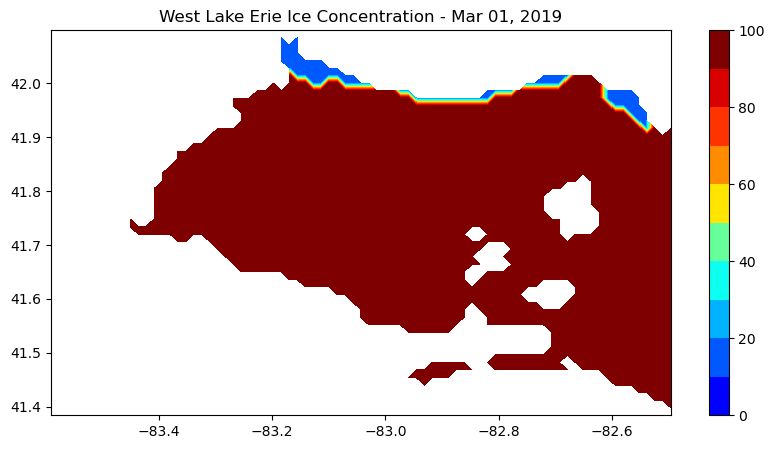

In [26]:
plt.subplots(figsize=(10, 5))

#plot 5872th ice concentration image: nan_ice_concentration[5872 ,:,:]
plt.contourf(nan_ice_concentration.longitude, nan_ice_concentration.latitude, nan_ice_concentration[5872,:,:], levs,cmap=cm)

#plot the color scale
plt.colorbar()

#example of how to add points to the map
#plt.scatter(np.linspace(-82,-80.5,num=4),np.repeat(42,4),c='black')

#example of how to add a contour line
#step = np.arange(9,26, 1)

#plt.contour(ds.longitude, ds.latitude, ds.sst[0,:,:],levels=step,linewidths=1)

#plot title
plt.title("West Lake Erie Ice Concentration - " + dates[5872].strftime('%b %d, %Y'))
plt.show()

#### Let's compute the daily mean over the west Lake Erie region:

In [27]:
res=np.nanmean(nan_ice_concentration,axis=(1,2))
res


array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

####  Let's plot the time-series (from 2019-03-01 to 2019-03-31):

In [28]:
for i, date in enumerate(dates):
    if date.strftime("%Y-%m-%d") == "2019-03-01":
        print(i, date)
    
    if date.strftime("%Y-%m-%d") == "2019-03-31":
        print(i, date)

5872 2019-03-01 12:00:00
5902 2019-03-31 12:00:00


In [29]:
print(res.shape)

(7146,)


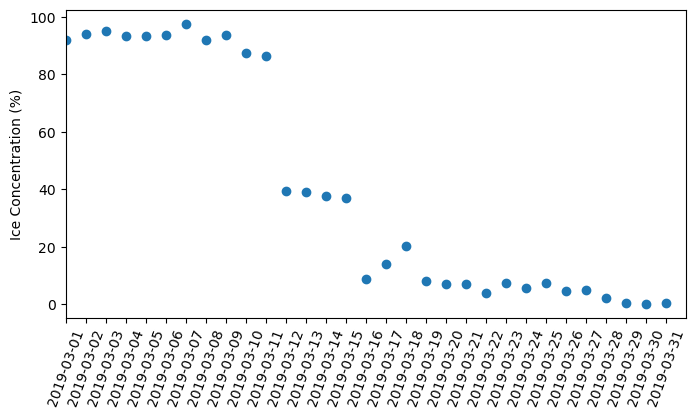

In [30]:
plt.figure(figsize=(8,4))

plt.scatter(dates[5872:5902+1],res[5872:5902+1])

#degree_sign = u"\N{DEGREE SIGN}"
plt.ylabel('Ice Concentration (%)')

plt.xlim(dates[5872], dates[5902+1])

plt.xticks(dates[5872:5902+1],rotation=70, fontsize=10 )
plt.show()

In [31]:
!jupyter nbconvert --to html GL_python_tutorial4.ipynb

[NbConvertApp] Converting notebook GL_python_tutorial4.ipynb to html
[NbConvertApp] Writing 313369 bytes to GL_python_tutorial4.html
